In [1]:
import os
from pyseeta import Detector
from pyseeta import Aligner
from pyseeta import Identifier

import cv2
from PIL import Image
import pandas as pd
from tqdm import tqdm
import numpy as np

# Set up detector and aligner

In [14]:
detector = Detector()
detector.set_min_face_size(0)
aligner = Aligner()

# Read Image and convert to grayscale

use detector to detect face 

In [46]:
imgpath = "/home/allen/babyhead.jpg"
img = cv2.imread(imgpath) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector.detect(gray)

# Extract face and landmarks
landmarks is array of landmarks coordinate <br>
with order of right eye, left eye, nose, right mouth, left mouth

In [47]:
for face in faces:
    x1, y1, x2, y2 = face.left, face.top, face.right, face.bottom
    landmarks = aligner.align(gray, face)
    for i, mark in enumerate(landmarks):
        img = cv2.circle(img, mark, 5, (0,255,255), -1)
        img = cv2.putText(img, str(i), mark, cv2.FONT_HERSHEY_DUPLEX, 2, (255,255,255), 2)

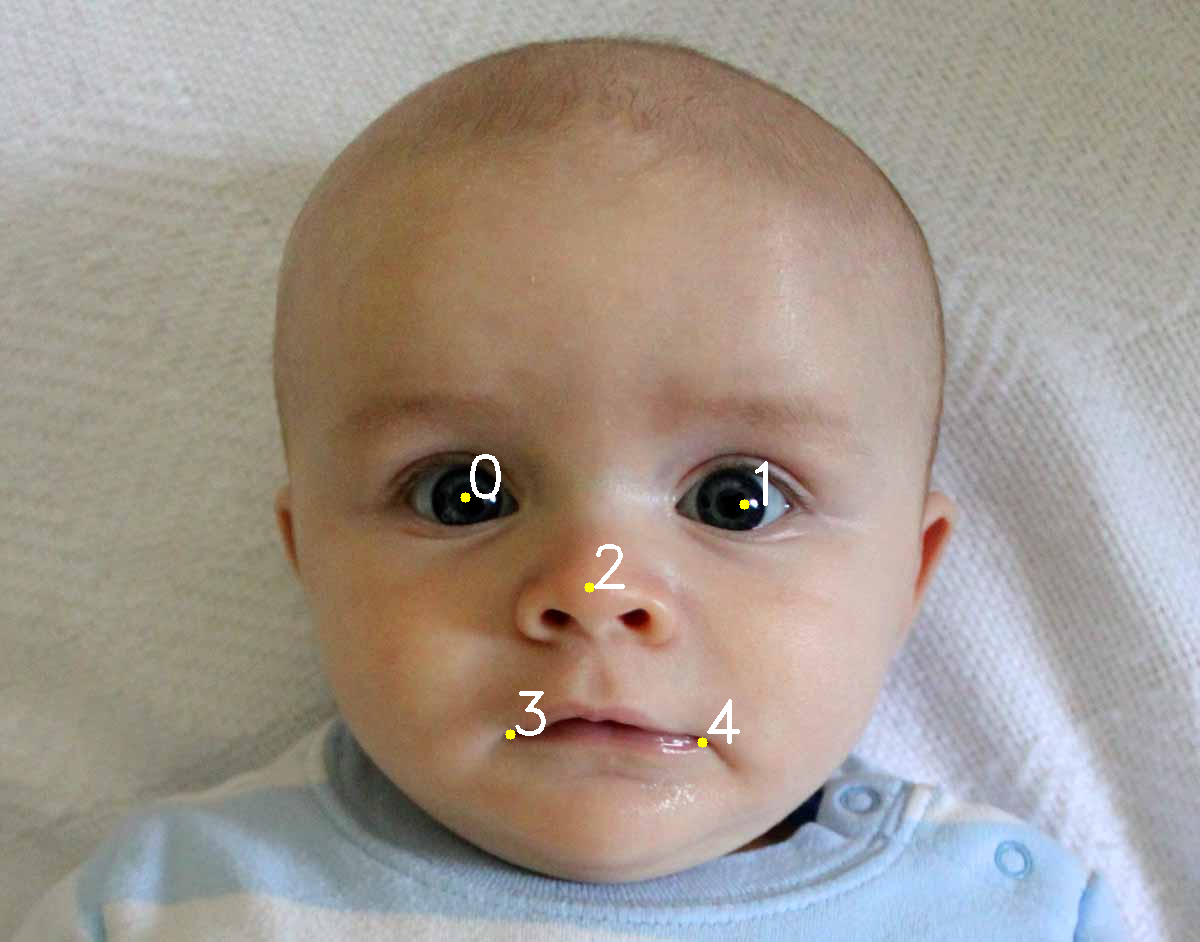

In [48]:
temp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
pil_img = Image.fromarray(temp)
pil_img